In [1]:
import numpy as np

import librosa

import scipy.io.wavfile

import senmf

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/home/gsmith/work/senmf/lib/python2.7/site-packages/librosa/core.py:26: UserWarning: Could not import scikits.samplerate. Falling back to scipy.signal
  'Falling back to scipy.signal')


### Compute a Spectrogram

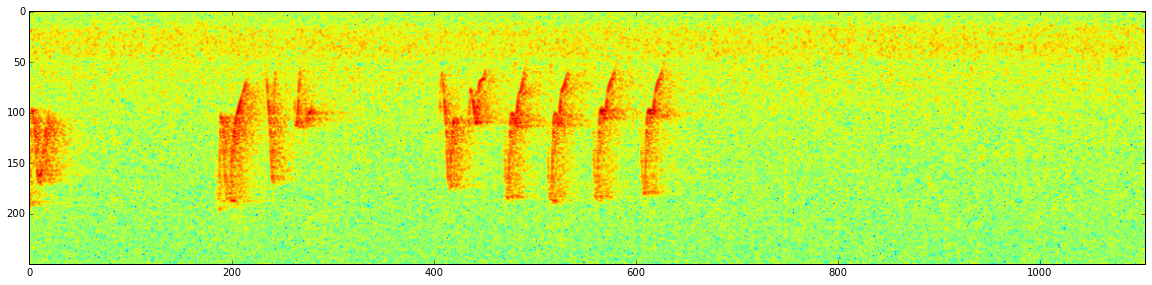

In [49]:
sr, x = scipy.io.wavfile.read('data/bird-songs.wav')
stft = librosa.stft(x, n_fft=1024, hop_length=200).T

X = np.abs(stft)[:,:250]
figure(figsize=(20,5))
imshow(np.log(X.T))

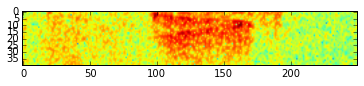

In [36]:
# manually extract a sample
S1 = X[0:40, :]
imshow(np.log(S1))

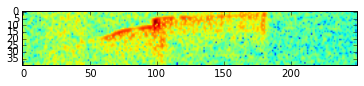

In [37]:
S2 = X[605:645, :]
imshow(np.log(S2))

### Decompose the Spectrogram

In [129]:
n_bases = 10
window_width = 40

nmf = senmf.SENMF(n_bases=n_bases, window_width=window_width, n_iter=1, X_shape=X.shape,
                  A_accel=0.5, D_accel=1.0)
A = nmf.rand_A()
D = nmf.rand_D()

#freq_mask = np.zeros((window_width, 250))
#freq_mask[:, 40:-40] = 1

#for b in range(n_bases-1):
#    D[b] = D[b] * freq_mask
#D[0] = S1 / 100
#D[1] = S2 / 100


#start things off with a single iteration
A, D = nmf.fit(X, A, D)

#now go until change between iterations is less that 0.1
nmf.n_iter = 10
nmf.epsilon = 0.1
%time A, D = nmf.fit(X, A, D)
print "fit in %d iterations" % nmf.fit_iter

CPU times: user 52.1 s, sys: 3.39 s, total: 55.5 s
Wall time: 55.5 s
fit in 4 iterations


### Inspect Decomposition

In [130]:
X_bar = nmf.reconstruct(A, D)

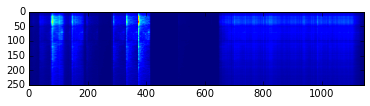

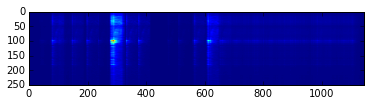

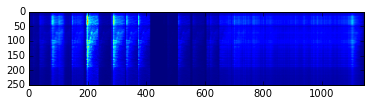

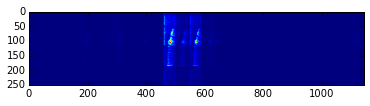

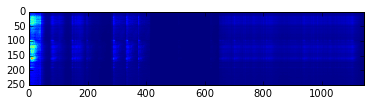

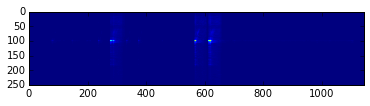

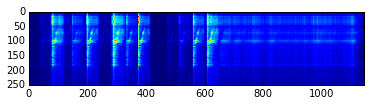

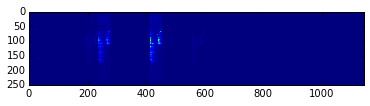

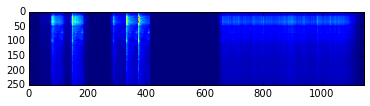

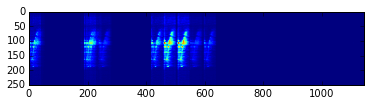

In [131]:
for i in range(n_bases):
    figure()
    imshow(scipy.signal.fftconvolve(D[i].T, np.atleast_2d(A[i])))

#### Show the estimate

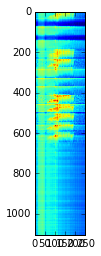

In [132]:
imshow(np.log(X_bar))

/usr/home/gsmith/work/senmf/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


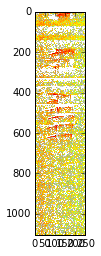

In [133]:
imshow(np.log(X-X_bar))

#### Show the activations

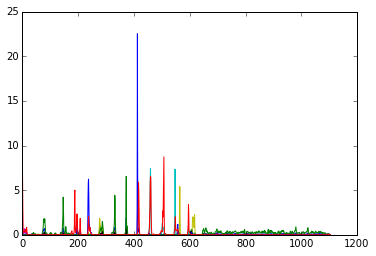

In [134]:
plot(A.T)

#### Show the basis windows


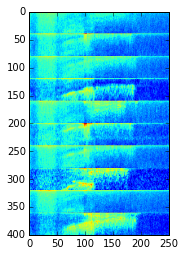

In [135]:
(x,y,z) = D.shape
imshow(np.log(D.reshape(x*y, z)))